面对对象OO

<font color="red">继承、封装和多态</font>

# 创建类(class)

In [19]:
class Employee:
    
   empCount = 0   ### 类变量，其值在此类中的所有实例之间共享

   def __init__(self, name, salary):
      self.name = name
      self.salary = salary
      Employee.empCount += 1

   def displayCount(self):
     print("Total Employee %d" % Employee.empCount)

   def displayEmployee(self):
      print("Name : ", self.name,  ", Salary: ", self.salary)

## 创建实例对象(instance)

In [20]:
emp1 = Employee("Maxsu", 2000)
emp2 = Employee("Kobe", 5000)

## 访问属性

In [21]:
emp1.displayEmployee()
emp2.displayEmployee()
print ("Total Employee %d" % Employee.empCount)

Name :  Maxsu , Salary:  2000
Name :  Kobe , Salary:  5000
Total Employee 2


## 添加，删除或修改类和对象的属性

In [22]:
emp1.salary = 7000  # Add an 'salary' attribute.
emp1.name = 'xyz'  # Modify 'age' attribute.
del emp1.salary  # Delete 'age' attribute.

### 函数类

In [14]:
hasattr(emp2, 'salary')   

False

In [11]:
getattr(emp2, 'salary')  

5000

In [12]:
setattr(emp2, 'salary', 7000) 

In [23]:
delattr(emp2, 'salary') 

## 对象管理

### \_\_dict\_\_

In [24]:
class Parent(object):

    def __init__(self):
        self.a = 2
        self.b = 3

    def p_test(self):
        pass


class Child(Parent):

    def __init__(self):
        super(Child, self).__init__()

    def c_test(self):
        pass

    def p_test(self):
        pass

In [25]:
p = Parent()
c = Child()
print(Parent.__dict__)
print(Child.__dict__)
print(p.__dict__)
print(c.__dict__)

{'__module__': '__main__', '__init__': <function Parent.__init__ at 0x0000022DAA272EA0>, 'p_test': <function Parent.p_test at 0x0000022DAA272E18>, '__dict__': <attribute '__dict__' of 'Parent' objects>, '__weakref__': <attribute '__weakref__' of 'Parent' objects>, '__doc__': None}
{'__module__': '__main__', '__init__': <function Child.__init__ at 0x0000022DAA272D90>, 'c_test': <function Child.c_test at 0x0000022DAA272D08>, 'p_test': <function Child.p_test at 0x0000022DAA272C80>, '__doc__': None}
{'a': 2, 'b': 3}
{'a': 2, 'b': 3}


# 运算符重载
__X__是特殊钩子，当实例出现在内置运算时会自动调用

类可覆盖多数内置类型运算

运算符覆盖方法没有默认值

## 初始化 \_\_init\_\_ & \_\_new\_\_

\_\_new\_\_方法先被调用，接着\_\_init\_\_被调用

\_\_new\_\_至少要有一个参数cls，代表要实例化的类，此参数在实例化时由Python解释器自动提供

\_\_new\_\_<font color="red">必须要有返回值</font>，返回实例化出来的实例，这个实例对象会传递给\_\_init\_\_方法中定义的 self 参数，以便实例对象被正确地初始化

\_\_init\_\_有一个参数self，就是这个\_\_new\_\_返回的实例，\_\_init\_\_在\_\_new\_\_的基础上可以完成一些其它初始化的动作，\_\_init\_\_不需要返回值

In [8]:
class A:
    def __init__(self):
        print("__init__ ")
        super().__init__()

    def __new__(cls):
        print("__new__ ")
        return super().__new__(cls)

    def __call__(self):  # 可以定义任意参数
        print('__call__ ')

A()

__new__ 
__init__ 


## 字符串

In [15]:
class Pair:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __repr__(self):
        return 'Pair({0.x!r}, {0.y!r})'.format(self)
    
    def __str__(self):
        return '({0.x!s}, {0.y!s})'.format(self)
    
    def __len__(self):
        return len(str(self.x))

In [16]:
p = Pair(3, 4)
p

Pair(3, 4)

In [3]:
print(p)   # __str__() output

(3, 4)


In [17]:
len(p)

1

In [4]:
_formats = {'ymd' : '{d.year}-{d.month}-{d.day}',
            'mdy' : '{d.month}/{d.day}/{d.year}',
            'dmy' : '{d.day}/{d.month}/{d.year}'
    }

class Date:
    def __init__(self, year, month, day):
        self.year = year
        self.month = month
        self.day = day
        
    def __format__(self, code):
        if code == '':
            code = 'ymd'
        fmt = _formats[code]
        return fmt.format(d=self)

In [6]:
d = Date(2012, 12, 21)
format(d,'mdy')

'12/21/2012'

## 算术运算符

In [19]:
class MyList:
    def __init__(self, iterable=()):
        self.data = list(iterable)

    def __repr__(self):
        return 'MyList({})'.format(self.data)

    def __add__(self, rhs):
        return MyList(self.data + rhs.data)

    def __mul__(self, rhs):
        return MyList(self.data * rhs)

L1 = MyList([1, 2, 3])
L2 = MyList([4, 5, 6])

L3 = L1 + L2
print(L3)  

MyList([1, 2, 3, 4, 5, 6])


### 反向运算符

### 复合赋值算数运算符

In [20]:
class MyList:
    def __init__(self, iterable=()):
        self.data = list(iterable)

    def __repr__(self):
        return 'MyList({})'.format(self.data)

    def __add__(self, rhs):
        return MyList(self.data + rhs.data)
   
    def __iadd__(self, rhs):
        print('__iadd__被调用了')
        self.data += rhs.data
        return self

L1 = MyList([1, 2, 3])
L2 = MyList([4, 5, 6])

L2 += L1  # 调用 __iadd__方法
print(L2)  

__iadd__被调用了
MyList([4, 5, 6, 1, 2, 3])


## 比较运算符

## 可哈希 \_\_hash\_\_

In [1]:
class Foo:
    def __init__(self, item):
        self.item = item

    def __eq__(self, other):
        print('使用了equal函数的对象的id',id(self))
        if isinstance(other, self.__class__):
            return self.__dict__ == other.__dict__
        else:
            return False
        
    def __hash__(self):
        print('f'+str(self.item)+'使用了hash函数')
        return hash(self.item)       

In [3]:
f1 = Foo(1)
f2 = Foo(2)
f3 = Foo(3)
fset = set([f1, f2, f3])
print(fset)

f1使用了hash函数
f2使用了hash函数
f3使用了hash函数
{<__main__.Foo object at 0x0000027870685748>, <__main__.Foo object at 0x00000278706858D0>, <__main__.Foo object at 0x00000278706855C0>}


In [4]:
f = Foo(3)

In [5]:
fset.add(f)

f3使用了hash函数
使用了equal函数的对象的id 2716305216960


f和f3找到的桶的位置是同一个位置，因为它俩的item是相同的

当执行fset.add(f)时，f就会调用它自身的__hash__函数，以找到f所属于的桶的位置。但此时桶里已经有别的球了，所以这时候就得用上__eq__来判断两个对象是否相等，从输出可以看出，是已有对象调用__eq__来和后来的对象进行比较。

从输出可以看出，是已有对象调用__eq__来和后来的对象进行比较（看对象的id）

## 位运算符

In [21]:
class OrderSet:
    def __init__(self, iterable=()):
        self.__data = iterable

    def __repr__(self):
        return 'OrderSet({})'.format(self.__data)

    def __and__(self, rhs):
        r = set(self.__data) & set(rhs.__data)
        return OrderSet(list(r))

    def __or__(self, rhs):
        r = set(self.__data) | set(rhs.__data)
        return OrderSet(list(r))

    def __xor__(self, rhs):
        r = set(self.__data) ^ set(rhs.__data)
        return OrderSet(list(r))

s1 = OrderSet([1, 2, 3, 4])
s2 = OrderSet([3, 4, 5])
print(s1 & s2)  # OrderSet([3, 4])
print(s1 | s2)  # OrderSet([1, 2, 3, 4, 5])
print(s1 ^ s2)  # OrderSet([1, 2, 5])

OrderSet([3, 4])
OrderSet([1, 2, 3, 4, 5])
OrderSet([1, 2, 5])


## 一元运算符

In [22]:
class MyList:
    def __init__(self, iterable=()):
        self.data = list(iterable)

    def __repr__(self):
        return 'MyList({})'.format(self.data)

    def __neg__(self):
        G = [-x for x in self.data]
        return MyList(G)

L1 = MyList([1, -2, 3, -4, 5])
L2 = -L1
print(L2)  

MyList([-1, 2, -3, 4, -5])


## \_\_bool\_\_

In [3]:
class Demo():

   def __init__(self,value = 0):

          self.value = value

   def __bool__(self):

          return bool(self.value > 5)

In [4]:
obj = Demo(3)
bool(obj)

False

## 存在 \_\_contains\_\_

In [ ]:
def __contains__(self, item):
    return item in self.__data

s1 = OrderSet([1, 2, 3, 4])
if 2 in s1:
    print('2 in s1 为真')

## 属性访问

In [1]:
class Proxy:
    def __init__(self, obj):
        self._obj = obj

    # Delegate attribute lookup to internal obj
    def __getattr__(self, name):
        print('getattr:', name)
        return getattr(self._obj, name)

    # Delegate attribute assignment
    def __setattr__(self, name, value):
        if name.startswith('_'):
            super().__setattr__(name, value)
        else:
            print('setattr:', name, value)
            setattr(self._obj, name, value)

    # Delegate attribute deletion
    def __delattr__(self, name):
        if name.startswith('_'):
            super().__delattr__(name)
        else:
            print('delattr:', name)
            delattr(self._obj, name)
            
class Spam:
    def __init__(self, x):
        self.x = x

    def bar(self, y):
        print('Spam.bar:', self.x, y)

In [2]:
s = Spam(2)
p = Proxy(s)
print(p.x)  # Outputs 2

getattr: x
2


In [3]:
p.bar(3)  
p.x = 37 

getattr: bar
Spam.bar: 2 3
setattr: x 37


## 索引和切片运算符

In [24]:
class MyList:
    def __init__(self, iterable=()):
        self.__data = list(iterable)

    def __repr__(self):
        return 'MyList({})'.format(self.__data)

    def __getitem__(self, i):
        print('i的值是', i)  # i的值是 3
        return self.__data[i]

    def __setitem__(self, key, value):
        self.__data[key] = value

    def __delitem__(self, key):
        # del self.__data[key]
        self.__data.pop(key)

L1 = MyList([1, -2, 0, -4, 5])
x = L1[3]
print(x)  # 4
L1[3] = 2
print(L1)  # MyList([1, -2, 0, 2, 5])

del L1[2]
print(L1)  # MyList([1, -2, 2, 5])

print(L1[::2])

i的值是 3
-4
MyList([1, -2, 0, 2, 5])
MyList([1, -2, 2, 5])
i的值是 slice(None, None, 2)
[1, 2]


## 实现调用 \_\_call\_\_

In [1]:
class Fib():
    def __call__(self, *args, **kwargs):
        ret = [1,1]
        num = int(args[0])
        if num == 1:
            return [1,]
        else:
            while len(ret)< num:
                ret.append(ret[-1]+ret[-2])
            return ret

In [2]:
fib = Fib()
print(fib(5))

[1, 1, 2, 3, 5]


## 迭代器 \_\_iter\_\_ & \_\_next\_\_ 

In [17]:
class A():
    def __init__(self,num):
        self.num = num
        self.start_num = -1
    
    def __iter__(self):
        return self
    
    def __next__(self):
        '''
        每一次for循环都调用该方法（必须存在）
        '''
        self.start_num += 1
        if self.start_num >= self.num:
            raise StopIteration()
        return self.start_num

In [18]:
list(A(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [19]:
for num in iter(A(10)):
    print(num)

0
1
2
3
4
5
6
7
8
9


# 类继承
class SubClassName (ParentClass1[, ParentClass2, ...])

In [ ]:
class Parent：
    .....

class Child(Parent):
    .....

### 从多个父类来构建一个新的类
class A:        
    .....

class B:         
    .....

class C(A, B): # subclass of A and B
    .....

<font color="red">继承搜索会从实例往上进行，之后到子类，然后到超类</font>

重载：在较低处发生的重新定义、取代属性的动作

<font color="red">为减少名称冲突，对类私有变量前面加“_"</font>

issubclass(sub，sup)布尔函数如果给定的子类sub确实是超类sup的子类返回True

isinstance(obj，Class)布尔函数如果obj是类Class的一个实例，或者是类的一个子类的实例则返回True

## 调用父类方法
super函数

In [22]:
class A:
    
    def spam(self):
        print('A.spam')
        
class B(A):
    def spam(self):
        print('B.spam')
        super().spam() # Call parent spam()

In [23]:
test=B()
test.spam()

B.spam
A.spam


### 常见用法1：\_\_init\_\_() 方法中确保父类被正确的初始化

In [24]:
class A:
    def __init__(self):
        self.x = 0
    
class B(A):
    def __init__(self):
        super().__init__()
        self.y = 1

### 常见用法2：覆盖Python 特殊方法的代码中

In [25]:
class Proxy:
    def __init__(self, obj):
        self._obj = obj
        
    # Delegate attribute lookup to internal obj
    def __getattr__(self, name):
        return getattr(self._obj, name)

    # Delegate attribute assignment
    def __setattr__(self, name, value):
        if name.startswith('_'):
            super().__setattr__(name, value) # Call original __setattr__
        else:
            setattr(self._obj, name, value)

## 方法重载

In [15]:
class Parent:        # define parent class
   def myMethod(self):
      print ('Calling parent method')

class Child(Parent): # define child class
   def myMethod(self):
      print ('Calling child method')

c = Child()          # instance of child
c.myMethod()         # child calls overridden method

Calling child method


## 重载运算符

In [16]:
class Vector:
   def __init__(self, a, b):
      self.a = a
      self.b = b

   def __str__(self):
      return 'Vector (%d, %d)' % (self.a, self.b)

   def __add__(self,other):
      return Vector(self.a + other.a, self.b + other.b)

v1 = Vector(2,10)
v2 = Vector(5,-2)
print (v1 + v2)

Vector (7, 8)


## 限制实例的属性\_\_slots\_\_ 

In [18]:
#仅允许绑定这三个属性，可以节约内存
#对继承的子类是不起作用，留出修改空间
class Date:
    __slots__ = ['year', 'month', 'day']
    def __init__(self, year, month, day):
        self.year = year
        self.month = month
        self.day = day

# 数据隐藏
<font color="red">双下划线前缀命名属性在类定义之外不可见</font>

单下划线可以

In [10]:
class JustCounter:
    __secretCount = 0
    _publicCount = 0

    def count(self):
      self.__secretCount += 1
      print (self.__secretCount)

counter = JustCounter()
counter.count()
counter.count()
print (counter._publicCount)
print (counter.__secretCount)

1
2
0


AttributeError: 'JustCounter' object has no attribute '__secretCount'

有时候定义的一个变量和某个保留关键字冲突，可以使用单下划线作为后缀

# 类中封装属性名
约定任何以<font color="red">单下划线_开头</font>的名字都是内部实现

使用<font color="red">双下划线__开头</font>会导致访问名称变成其他形式,<font color="red">确保这种属性通过继承是无法被覆盖</font>

In [1]:
class B:
    def __init__(self):
        self.__private = 0
    
    # 私有属性会被分别重命名为 _B__private 和 _B__private_method
    def __private_method(self):
        pass

    def public_method(self):
        pass
        self.__private_method()
        
class C(B):
    def __init__(self):
        super().__init__()
        self.__private = 1 # Does not override B.__private

    # Does not override B.__private_method()
    # 私有属性 __private 和 __private_method 被重命名为 _C__private 和 _C__private_method
    def __private_method(self):
        pass

In [2]:
C()._C__private

1

# 创建可管理的属性 @property

<font color="red">@property把一个getter方法变成属性，又创建了装饰器@func.setter和@func.deleter</font>

只定义getter方法，不定义setter方法就是一个只读属性

In [17]:
class Person:
    def __init__(self, first_name):
        self._first_name = first_name

    # Getter function
    @property
    def first_name(self):
        return self._first_name

    # Setter function
    @first_name.setter
    def first_name(self, value):
        if not isinstance(value, str):
            raise TypeError('Expected a string')
        self._first_name = value

    # Deleter function (optional)
    @first_name.deleter
    def first_name(self):
        raise AttributeError("Can't delete attribute")

## 子类中扩展property

In [9]:
class Person:
    
    def __init__(self, name):
        self.name = name
        
    # Getter function
    @property
    def name(self):
        return self._name
    
    # Setter function
    @name.setter
    def name(self, value):
        if not isinstance(value, str):
            raise TypeError('Expected a string')
        self._name = value
        
    # Deleter function
    @name.deleter
    def name(self):
        raise AttributeError("Can't delete attribute")
        
class SubPerson(Person):
    
    @property
    def name(self):
        print('Getting name')
        return super().name
    
    @name.setter
    def name(self, value):
        print('Setting name to', value)
        super().name.__set__(self, value)
        
    @name.deleter
    def name(self):
        print('Deleting name')
        super().name.__delete__(self)

In [27]:
class SubPerson(Person):
    @Person.name.getter
    def name(self):
        print('Getting name')
        return super().name

## 延迟计算属性
将一个只读属性定义成一个property，并且只在访问的时候才去计算结果；一旦被访问，希望值被存储起来

In [29]:
class lazyproperty:
    def __init__(self, func):
        self.func = func
        
    def __get__(self, instance, cls):
        if instance is None:
            return self
        else:
            value = self.func(instance)
            setattr(instance, self.func.__name__, value)
            return value

In [30]:
import math

class Circle:
    def __init__(self, radius):
        self.radius = radius
    
    @lazyproperty
    def area(self):
        print('Computing area')
        return math.pi * self.radius ** 2

    @lazyproperty
    def perimeter(self):
        print('Computing perimeter')
        return 2 * math.pi * self.radius

In [31]:
c = Circle(4.0)

In [32]:
c.radius

4.0

In [33]:
c.area

Computing area


50.26548245743669

# 实例方法vs类方法vs静态方法

实例方法：不带任何装饰器，第一个参数必须是 self（约定）

类方法：classmethod，第一个参数必须是cls（约定）

静态方法：staticmethod，跟普通函数没什么区别，与类和实例都没有所谓的绑定关系

In [1]:
class A(object):
    def m1(self, n):
        print("self:", self)

    @classmethod
    def m2(cls, n):
        print("cls:", cls)

    @staticmethod
    def m3(n):
        pass

In [4]:
a = A()
a.m1(1) # self: <__main__.A object at 0x000001E596E41A90>
A.m2(1) # cls: <class '__main__.A'>
A.m3(1)

self: <__main__.A object at 0x000002E674E12048>
cls: <class '__main__.A'>


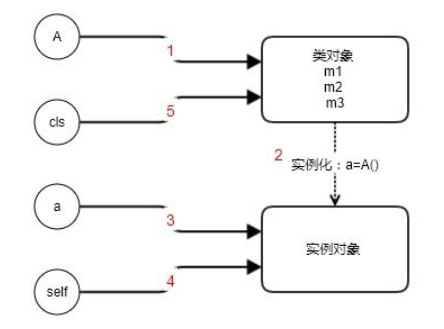

In [6]:
from IPython.display import Image
Image(filename="C:/Users/86188/Desktop/class.jpg",width=400,height=300)

## 静态方法的使用场景
如果在方法中不需要访问任何实例方法和属性，纯粹地通过传入参数并返回数据的功能性方法，那么它就适合用静态方法来定义，它节省了实例化对象的开销成本，

In [ ]:
from hashlib import sha1
import tornado.web

class SignatureHandler(tornado.web.RequestHandler):
    def get(self):
        """
         根据签名判断请求是否来自微信
        """
        signature = self.get_query_argument("signature", None)
        echostr = self.get_query_argument("echostr", None)
        timestamp = self.get_query_argument("timestamp", None)
        nonce = self.get_query_argument("nonce", None)
        if self._check_sign(TOKEN, timestamp, nonce, signature):
            logger.info("微信签名校验成功")
            self.write(echostr)
        else:
            self.write("你不是微信发过来的请求")

    @staticmethod
    def _check_sign(token, timestamp, nonce, signature):
        sign = [token, timestamp, nonce]
        sign.sort()
        sign = "".join(sign)
        sign = sha1(sign).hexdigest()
        return sign == signature

## 类方法的使用场景
作为工厂方法创建实例对象，例如内置模块 datetime.date 类中就有大量使用类方法作为工厂方法，以此来创建date对象

In [ ]:
class date:

    def __new__(cls, year, month=None, day=None):
        self = object.__new__(cls)
        self._year = year
        self._month = month
        self._day = day
        return self

    @classmethod
    def fromtimestamp(cls, t):
        y, m, d, hh, mm, ss, weekday, jday, dst = _time.localtime(t)
        return cls(y, m, d)

    @classmethod
    def today(cls):
        t = _time.time()
        return cls.fromtimestamp(t)

# 延迟计算属性
将一个只读属性定义成一个property，并且只在访问的时候才会计算结果，但是一旦被访问后，结果值被缓存起来

主要目的是为了提升性能

In [26]:
class lazyproperty:
    def __init__(self, func):
        self.func = func

    def __get__(self, instance, cls):
        if instance is None:
            return self
        else:
            value = self.func(instance)
            setattr(instance, self.func.__name__, value)
            return value

In [27]:
import math

class Circle:
    def __init__(self, radius):
        self.radius = radius

    @lazyproperty
    def area(self):
        print('Computing area')
        return math.pi * self.radius ** 2

    @lazyproperty
    def perimeter(self):
        print('Computing perimeter')
        return 2 * math.pi * self.radius

In [28]:
c = Circle(4.0)
c.radius

4.0

In [29]:
c.area

Computing area


50.26548245743669

In [30]:
c.area

50.26548245743669